In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

# Linear Regression

In [70]:
# Prepare the data
oecd_bli = pd.read_csv("data/BLI_06062023174302510.csv")
gdp_per_capita = pd.read_csv("data/WEO_Data.xls", thousands=',', delimiter='\t', na_values="n/a", encoding='utf16')
country_stats = pd.merge(gdp_per_capita,oecd_bli,'outer')
country_stats = country_stats.dropna(subset=["GDP per capita","Life satisfaction"])
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

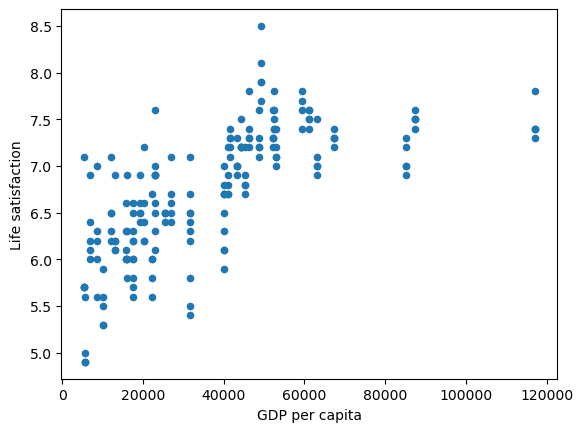

In [71]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [72]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

LinearRegression()

In [ ]:
# Train the model
model.fit(X, y)

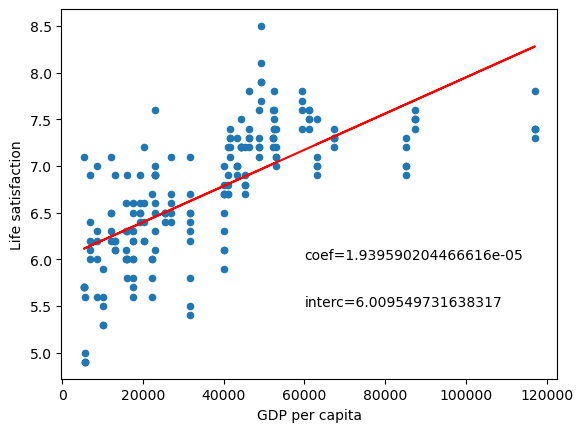

In [80]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.plot(X[:,0], model.coef_[0] * X[:,0]+model.intercept_[0], "r")
plt.text(60000,6,'coef='+str(model.coef_[0,0]))
plt.text(60000,5.5,'interc='+str(model.intercept_[0]))
plt.show()

In [81]:
# Make a prediction for Cyprus
X_new = [[27783.759]]
print(model.predict(X_new))

[[6.5484408]]


# k-NN

In [82]:
import sklearn.neighbors
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)

In [83]:
# Train the model
model2.fit(X, y)

KNeighborsRegressor()

In [106]:
X_sorted = X.copy()
X_sorted[:,0] = sorted(X[:,0])

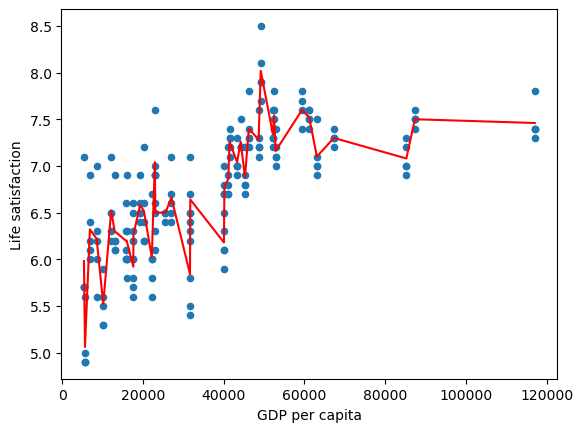

In [107]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.plot(X_sorted, model2.predict(X_sorted), 'r')
plt.show()